In [46]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
#Import data
gene_data = pd.read_csv("../cs229Project/data/gene_expression.csv")

In [20]:
# clinical = pd.read_csv("../cs229Project/data/clinical.csv")
clin_to_import = ["cohort", "type_cancer_3"]
clinical = pd.read_csv("../cs229Project/data/clinical.csv", usecols = clin_to_import) 

In [29]:
clinical['y'] = clinical['type_cancer_3'].apply(lambda x: 0 if x == 'CO' else 1)
# clinical
toDrop = []
for x in range(3853):
    if x >= 3821:
        toDrop.append(x)
# toDrop

In [30]:
merge = clinical[['cohort', 'y']].join(gene_data.T)
merge_y = merge['y']
merge_x = merge.drop(columns=['cohort','y'])

In [31]:
train_set, test_set = train_test_split(merge, test_size=0.2, random_state=77, stratify=merge.get('cohort').values)

In [32]:
train_set.groupby('cohort').size()

cohort
1    122
2    230
dtype: int64

In [33]:
test_set.groupby('cohort').size()

cohort
1    30
2    58
dtype: int64

In [34]:
y_train = train_set['y']
x_train = train_set.drop(columns = ['cohort', 'y'])
x_train = x_train.iloc[:, 0:3821]
x_train

,cg00009553,cg00017475,cg00018539,cg00019576,cg00019778,cg00027650,cg00039016,cg00040423,cg00042568,cg00049475,...,cg27615095,cg27617724,cg27619646,cg27630554,cg27640064,cg27640150,cg27641961,cg27650870,cg27650985,cg27666046
NS047BC,0.364551,0.837109,0.866511,0.882094,0.045116,0.626384,0.821088,0.041608,0.129566,0.813178,...,0.763900,0.432341,0.664397,0.764497,0.385266,0.815070,0.328300,0.358575,0.696681,0.381444
NS007BC,0.265829,0.822958,0.831262,0.755286,0.048733,0.696751,0.860567,0.040988,0.106027,0.838433,...,0.845178,0.518068,0.702459,0.802667,0.377821,0.905054,0.324087,0.350173,0.747476,0.588038
E028BC,0.612027,0.889197,0.852238,0.947260,0.046290,0.602360,0.861875,0.052118,0.099170,0.795960,...,0.810775,0.502979,0.532263,0.917056,0.283542,0.854299,0.274204,0.378263,0.745742,0.412047
E065LY,0.588491,0.882635,0.876857,0.980611,0.038022,0.617290,0.872348,0.042892,0.096497,0.811616,...,0.774951,0.549531,0.653306,0.837525,0.255529,0.889466,0.322165,0.401900,0.728797,0.473763
NS068BC,0.312780,0.820930,0.873718,0.759489,0.047778,0.655820,0.864674,0.037840,0.082471,0.847603,...,0.843356,0.481417,0.689258,0.496043,0.326190,0.832455,0.285215,0.309903,0.772736,0.602731
NS014BC,0.357521,0.836657,0.827337,0.830815,0.046225,0.657383,0.842168,0.040988,0.102787,0.806090,...,0.817016,0.456840,0.734673,0.721618,0.281391,0.849143,0.299554,0.492379,0.756524,0.518948
NS050LY,0.558741,0.837642,0.907960,0.983875,0.044077,0.572022,0.859544,0.049995,0.119900,0.793472,...,0.740502,0.443686,0.572457,0.902185,0.293018,0.859879,0.310781,0.322306,0.639821,0.461588
NS268LY,0.533214,0.866841,0.840147,0.960910,0.043166,0.636662,0.863426,0.038453,0.106998,0.761257,...,0.749802,0.447442,0.607510,0.851587,0.288947,0.860199,0.287114,0.317407,0.684686,0.452751
NS420LY,0.583788,0.857103,0.828519,0.892530,0.048828,0.642147,0.859735,0.038620,0.082749,0.794730,...,0.819526,0.412987,0.551918,0.628814,0.273758,0.833164,0.259285,0.335217,0.565969,0.491032
NS055BC,0.376048,0.807653,0.820776,0.921542,0.055823,0.520671,0.888653,0.044686,0.107130,0.825862,...,0.838833,0.444461,0.549380,0.960246,0.325098,0.859534,0.298701,0.311117,0.725380,0.427368


In [35]:
y_test = test_set['y']
x_test = test_set.drop(columns = ['cohort', 'y'])
x_test = x_test.iloc[:,0:3821]
x_test.shape

(88, 3821)

In [192]:
#KNN classification (first attempt, not used in final report)
k_vals = range(1,351,2)
stats = []
for i in k_vals:
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train.values, y_train.values)
    y_predicted = model.predict(x_test.values)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predicted).ravel()
    #sensitivity = recall
    s = tp / (tp+fn)
    #specificity
    sp = tn / (tn+fp)
    #accuracy
    a = (tp+tn) / (tp+tn+fp+fn)
    #precision = positive predictive value
    p = tp / (tp+fp)
    #f1-score
    f1 = (2*tp)/ (2*tp + fp + fn)
    stats.append([i, tn, fp, fn, tp, s, sp, a, p, f1])
#     print(stats)
#     print(f"Accuracy for {i} neighbors: {round(100*metrics.accuracy_score(y_test, y_predicted),2)} %")

In [193]:
knn_stats = np.array(stats)
knn_stats

array([[  1.        ,  19.        ,  29.        , ...,   0.5       ,
          0.46296296,   0.53191489],
       [  3.        ,  25.        ,  23.        , ...,   0.54545455,
          0.5       ,   0.53488372],
       [  5.        ,  23.        ,  25.        , ...,   0.52272727,
          0.47916667,   0.52272727],
       ...,
       [345.        ,   0.        ,  48.        , ...,   0.45454545,
          0.45454545,   0.625     ],
       [347.        ,   0.        ,  48.        , ...,   0.45454545,
          0.45454545,   0.625     ],
       [349.        ,   0.        ,  48.        , ...,   0.45454545,
          0.45454545,   0.625     ]])

/bin/sh: import: command not found
/bin/sh: line 0: fg: no job control


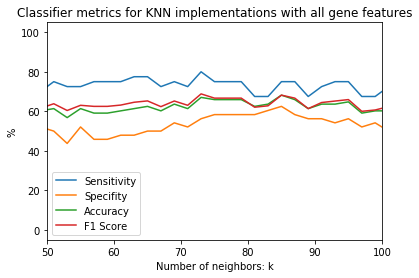

In [196]:
plt.plot(knn_stats[:,0], 100*knn_stats[:,5], label="Sensitivity")
plt.plot(knn_stats[:,0], 100*knn_stats[:,6], label="Specifity")
plt.plot(knn_stats[:,0], 100*knn_stats[:,7], label="Accuracy")
plt.plot(knn_stats[:,0], 100*knn_stats[:,9], label="F1 Score")
plt.xlabel("Number of neighbors: k")
plt.ylabel("%")
plt.title("Classifier metrics for KNN implementations with all gene features")
plt.xlim((50,100))
plt.legend()

(0.74, 0.78)

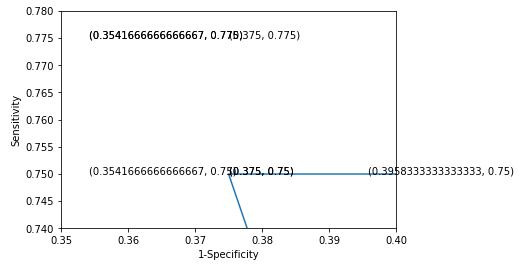

In [216]:
plt.plot(np.subtract(1,knn_stats[:,6]), knn_stats[:,5])
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
for xy in zip(knn_stats[:,6], knn_stats[:,5]):                                      
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlim((0.35,0.4))
plt.ylim((0.74,0.78))

In [201]:
top5k_acc = np.argpartition(knn_stats[:,7], -5)[-5:]
print(knn_stats[top5k_acc,0])
print(knn_stats[top5k_acc,7])
knn_stats[35]

[ 77.  85.  79. 117.  73.]
[0.65909091 0.68181818 0.65909091 0.65909091 0.67045455]


array([71.        , 25.        , 23.        , 11.        , 29.        ,
        0.725     ,  0.52083333,  0.61363636,  0.55769231,  0.63043478])

In [202]:
# top5k_f1 = np.argpartition(knn_stats[:,9], -5)[-5:]
# print(knn_stats[top5k_f1,0])
# print(knn_stats[top5k_f1,9])

old shape: (352, 3821)
new shape: (352, 382)
label train shape:(352,)


In [115]:
stats_knn_p10 = []
for i in range(1,100,2):
    model = KNeighborsClassifier(n_neighbors = int(i))
    model.fit(train_x_p10, y_train.values)
    y_predicted = model.predict(test_x_p10)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predicted).ravel()
    #sensitivity = recall
    s = tp / (tp+fn)
    #specificity
    sp = tn / (tn+fp)
    #accuracy
    a = (tp+tn) / (tp+tn+fp+fn)
    #precision = positive predictive value
    p = tp / (tp+fp)
    #f1-score
    f1 = (2*tp)/ (2*tp + fp + fn)
    stats_knn_p10.append([i, tn, fp, fn, tp, s, sp, a, p, f1])

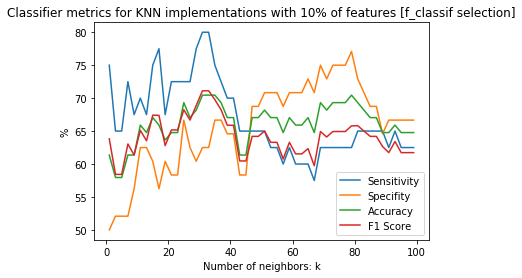

In [116]:
np_stats = np.array(stats_knn_p10)
plt.plot(np_stats[:,0], 100*np_stats[:,5], label="Sensitivity")
plt.plot(np_stats[:,0], 100*np_stats[:,6], label="Specifity")
plt.plot(np_stats[:,0], 100*np_stats[:,7], label="Accuracy")
plt.plot(np_stats[:,0], 100*np_stats[:,9], label="F1 Score")
plt.xlabel("Number of neighbors: k")
plt.ylabel("%")
plt.title("Classifier metrics for KNN implementations with 10% of features [f_classif selection]")
# plt.xlim((0,50))
plt.legend()

In [117]:
top5k_p10_acc = np.argpartition(np_stats[:,7], -5)[-5:]
print(np_stats[top5k_p10_acc,0])
print(np_stats[top5k_p10_acc,7])

[73. 35. 79. 33. 31.]
[0.69318182 0.70454545 0.70454545 0.70454545 0.70454545]


In [25]:
# 
# knn = KNeighborsClassifier(n_neighbors = 73)
# sfs = SFS(knn, 
#           k_features=30, #(int(x_train.shape[1]/10)))
#           forward=True, 
#           floating=False, 
#           scoring='accuracy',
#           cv=4,
#           n_jobs=-1)
# sfs = sfs.fit(x_train, y_train)

# print('\nSequential Forward Selection (k=385):')
# print(sfs.k_feature_idx_)
# print('CV Score:')
# print(sfs.k_score_)


Sequential Forward Selection (k=385):
(4, 7, 15, 28, 29, 30, 31, 36, 49, 68, 98, 100, 109, 113, 117, 122, 124, 127, 129, 131, 143, 145, 159, 170, 174, 212, 220, 225, 245, 253, 262, 277, 278, 282, 286, 293, 310, 323, 327, 329, 336, 346, 350, 366, 376, 384, 392, 396, 413, 437, 443, 448, 473, 475, 476, 482, 491, 493, 506, 530, 533, 544, 546, 550, 555, 566, 570, 571, 576, 579, 581, 620, 633, 636, 637, 657, 659, 662, 671, 676, 689, 690, 692, 704, 705, 707, 727, 762, 763, 769, 775, 777, 791, 814, 821, 826, 839, 860, 863, 864, 868, 877, 907, 918, 927, 938, 950, 952, 988, 991, 1005, 1025, 1052, 1058, 1073, 1085, 1092, 1093, 1109, 1112, 1136, 1150, 1177, 1200, 1207, 1214, 1240, 1242, 1248, 1264, 1266, 1269, 1279, 1302, 1305, 1322, 1336, 1346, 1348, 1371, 1372, 1384, 1386, 1388, 1403, 1417, 1418, 1422, 1423, 1428, 1438, 1439, 1461, 1471, 1476, 1489, 1504, 1506, 1519, 1525, 1568, 1572, 1590, 1614, 1619, 1632, 1643, 1651, 1677, 1680, 1681, 1686, 1691, 1696, 1712, 1713, 1714, 1741, 1743, 1758, 176

In [120]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
knn = KNeighborsClassifier(n_neighbors = 13)
sfs2 = SFS(knn, 
          k_features=40, #(int(x_train.shape[1]/10)))
          forward=True, 
          floating=False, 
          scoring='accuracy',
          verbose=2,
          cv=10,
          n_jobs=-1)
sfs2 = sfs2.fit(x_train, y_train)

print('\nSequential Forward Selection (k=13):')
print(sfs2.k_feature_idx_)
print('CV Score:')
print(sfs2.k_score_)

[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 1388 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 2520 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 3821 out of 3821 | elapsed:   43.3s finished

[2018-12-11 15:28:14] Features: 1/40 -- score: 0.6676984126984127[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 592 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 1404 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 2536 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 3820 out of 3820 | elapsed:   36.8s finished

[2018-12-11 15:28:52] Features: 2/40 -- score: 0.6842857142857143[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 1388 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 2520 ta


[2018-12-11 15:42:11] Features: 20/40 -- score: 0.7867460317460317[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 1928 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 3388 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done 3801 out of 3801 | elapsed:   48.8s finished

[2018-12-11 15:43:00] Features: 21/40 -- score: 0.7867460317460317[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 1648 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 3108 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 3800 out of 3800 | elapsed:   50.5s finished

[2018-12-11 15:43:51] Features: 22/40 -- score: 0.7867460317460317[Parallel(n_jobs=-1)]: Done  

[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 2002 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:   42.6s



Sequential Forward Selection (k=13):
(212, 376, 482, 550, 570, 579, 961, 1109, 1150, 1336, 1386, 1403, 1476, 1590, 1677, 1713, 1789, 1811, 2013, 2046, 2251, 2262, 2389, 2397, 2406, 2460, 2464, 2520, 2532, 2594, 2729, 2866, 2897, 2976, 3171, 3256, 3479, 3598, 3714, 3784)
CV Score:
0.7838888888888889


[Parallel(n_jobs=-1)]: Done 3782 out of 3782 | elapsed:   55.4s finished

[2018-12-11 15:57:49] Features: 40/40 -- score: 0.7838888888888889

In [35]:
# sfs_data = 

In [51]:
sfs_data =pd.DataFrame.from_dict(sfs2.get_metric_dict()).T

,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
1,0.678977,0.0198501,"[0.6931818181818182, 0.6818181818181818, 0.659...","(839,)","(cg05512099,)",0.0123832,0.00714946
2,0.707386,0.052122,"[0.75, 0.6818181818181818, 0.6704545454545454,...","(692, 839)","(cg04630334, cg05512099)",0.0325157,0.0187729
3,0.735795,0.0838466,"[0.7840909090909091, 0.7159090909090909, 0.659...","(692, 839, 2360)","(cg04630334, cg05512099, cg16022555)",0.0523067,0.0301993
4,0.747159,0.0552134,"[0.7954545454545454, 0.7272727272727273, 0.704...","(692, 839, 2360, 3020)","(cg04630334, cg05512099, cg16022555, cg21376774)",0.0344442,0.0198864
5,0.755682,0.0610973,"[0.8068181818181818, 0.7386363636363636, 0.704...","(692, 839, 1207, 2360, 3020)","(cg04630334, cg05512099, cg07894846, cg1602255...",0.0381148,0.0220056
6,0.764205,0.0595503,"[0.8181818181818182, 0.75, 0.7159090909090909,...","(245, 692, 839, 1207, 2360, 3020)","(cg01763173, cg04630334, cg05512099, cg0789484...",0.0371497,0.0214484
7,0.767045,0.0663061,"[0.8295454545454546, 0.75, 0.7159090909090909,...","(245, 692, 839, 1207, 2360, 2420, 3020)","(cg01763173, cg04630334, cg05512099, cg0789484...",0.0413643,0.0238817
8,0.772727,0.0617724,"[0.8295454545454546, 0.75, 0.7272727272727273,...","(245, 293, 692, 839, 1207, 2360, 2420, 3020)","(cg01763173, cg02081905, cg04630334, cg0551209...",0.038536,0.0222488
9,0.772727,0.0576031,"[0.8181818181818182, 0.75, 0.7272727272727273,...","(245, 293, 692, 839, 1207, 2360, 2420, 3020, 3...","(cg01763173, cg02081905, cg04630334, cg0551209...",0.035935,0.0207471
10,0.772727,0.0576031,"[0.8181818181818182, 0.75, 0.7272727272727273,...","(245, 293, 692, 839, 1109, 1207, 2360, 2420, 3...","(cg01763173, cg02081905, cg04630334, cg0551209...",0.035935,0.0207471


In [110]:
#NOTE: this is the forward feature selection described in the final report
!from mlxtend.feature_selection import SequentialFeatureSelector as SFS
knn = KNeighborsClassifier(n_neighbors = 13)
sfs = SFS(knn, 
          k_features=30, #(int(x_train.shape[1]/10)))
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=10,
          verbose=2,
          n_jobs=-1)
sfs = sfs.fit(x_train, y_train)

print('\nSequential Forward Selection (K = 13, k=30):')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)

from: can't read /var/mail/mlxtend.feature_selection


NameError: name 'SFS' is not defined

In [109]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.5, 1])
plt.xlim([1,30])
plt.title('Sequential Forward Selection (w. StdDev) for 13-nearest-neighbors \n starting with all features')
plt.grid()
plt.show()

NameError: name 'sfs' is not defined

In [134]:
sfs_data = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_data


,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
1,0.670714,0.0669463,"[0.5833333333333334, 0.6666666666666666, 0.8, ...","(839,)","(cg05512099,)",0.0901375,0.0300458
2,0.710397,0.0664556,"[0.6944444444444444, 0.6666666666666666, 0.857...","(839, 3318)","(cg05512099, cg23961973)",0.0894768,0.0298256
3,0.727222,0.0631603,"[0.75, 0.7222222222222222, 0.8571428571428571,...","(839, 1155, 3318)","(cg05512099, cg07596054, cg23961973)",0.08504,0.0283467
4,0.738651,0.0726987,"[0.75, 0.7222222222222222, 0.8857142857142857,...","(839, 1155, 2636, 3318)","(cg05512099, cg07596054, cg18290624, cg23961973)",0.0978826,0.0326275
5,0.741587,0.059988,"[0.75, 0.6944444444444444, 0.8857142857142857,...","(839, 1133, 1155, 2636, 3318)","(cg05512099, cg07470001, cg07596054, cg1829062...",0.0807687,0.0269229
6,0.741667,0.0647678,"[0.75, 0.6666666666666666, 0.8857142857142857,...","(839, 1133, 1155, 1240, 2636, 3318)","(cg05512099, cg07470001, cg07596054, cg0812147...",0.0872043,0.0290681
7,0.747222,0.0623571,"[0.75, 0.7222222222222222, 0.8857142857142857,...","(839, 1133, 1155, 1240, 2636, 2786, 3318)","(cg05512099, cg07470001, cg07596054, cg0812147...",0.0839585,0.0279862
8,0.747222,0.0623571,"[0.75, 0.7222222222222222, 0.8857142857142857,...","(212, 839, 1133, 1155, 1240, 2636, 2786, 3318)","(cg01544215, cg05512099, cg07470001, cg0759605...",0.0839585,0.0279862
9,0.747222,0.0623571,"[0.75, 0.7222222222222222, 0.8857142857142857,...","(28, 212, 839, 1133, 1155, 1240, 2636, 2786, 3...","(cg00180277, cg01544215, cg05512099, cg0747000...",0.0839585,0.0279862
10,0.747222,0.0623571,"[0.75, 0.7222222222222222, 0.8857142857142857,...","(28, 212, 245, 839, 1133, 1155, 1240, 2636, 27...","(cg00180277, cg01544215, cg01763173, cg0551209...",0.0839585,0.0279862


In [146]:
final30_73NN_startingall = list(sfs_data.iloc[29]['feature_names'])
np.savetxt('knn_30final_startingall', final30_73NN_startingall, fmt="%s")

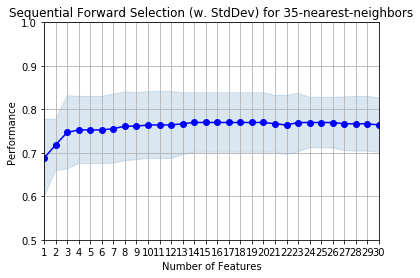

In [59]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs2.get_metric_dict(), kind='std_dev')

plt.ylim([0.5, 1])
plt.xlim([1,30])
plt.title('Sequential Forward Selection (w. StdDev) for 35-nearest-neighbors')
plt.grid()
plt.show()

In [147]:
final_features = list(list(sfs_data.iloc[29]['feature_names']))
x_train_reduced = x_train[final30_73NN_startingall]
x_test_reduced = x_test[final30_73NN_startingall]
x_test_reduced

,cg00091953,cg00180277,cg00691969,cg01059731,cg01544215,cg01763173,cg02007150,cg02081905,cg02381383,cg02553663,...,cg08121478,cg08712866,cg09100013,cg09179008,cg09742688,cg09861075,cg18290624,cg18853071,cg19538089,cg23961973
E060LY,0.021217,0.029073,0.031823,0.037501,0.014727,0.041211,0.026690,0.004056,0.026201,0.001914,...,0.027364,0.003791,0.003218,0.003032,0.002196,0.497577,0.270217,0.026155,0.147453,0.916962
E077LY,0.007450,0.026997,0.033577,0.044872,0.009180,0.025090,0.043216,0.004955,0.027283,0.008796,...,0.040091,0.003688,0.003695,0.002131,0.000632,0.848902,0.151700,0.025631,0.019908,0.943253
NS212LY,0.020649,0.029190,0.023966,0.040904,0.009012,0.017569,0.025734,0.004180,0.028837,0.002664,...,0.032475,0.010340,0.003080,0.003714,0.001464,0.816202,0.109322,0.026127,0.005155,0.929046
E053BC,0.028874,0.033465,0.037332,0.049085,0.015866,0.026423,0.030491,0.006244,0.029611,0.002301,...,0.031641,0.004755,0.002647,0.000337,0.000846,0.837241,0.122811,0.025373,0.008618,0.873250
E064LY,0.024460,0.030270,0.035661,0.048897,0.020283,0.027391,0.042365,0.008596,0.034285,0.000158,...,0.035794,0.003081,0.001049,0.003578,0.002539,0.878206,0.106188,0.027792,0.010263,0.864617
E071BC,0.022489,0.024720,0.037332,0.034980,0.012663,0.027146,0.039057,0.005670,0.030623,0.006482,...,0.021979,0.007809,0.005428,0.001181,0.001916,0.833428,0.127362,0.021568,0.017560,0.886428
NS253LY,0.022552,0.027474,0.027064,0.050881,0.008472,0.023053,0.027716,0.006681,0.037204,0.002796,...,0.029760,0.003971,0.005170,0.002151,0.001526,0.807737,0.080884,0.027206,0.005638,0.915138
NS193LY,0.029980,0.020262,0.036048,0.031814,0.008932,0.019627,0.015561,0.003250,0.032036,0.000723,...,0.038251,0.001718,0.002062,0.002163,0.001812,0.841290,0.136978,0.029029,0.009633,0.915927
NS151LY,0.030601,0.026853,0.029516,0.038445,0.011578,0.018666,0.033703,0.005414,0.020145,0.004683,...,0.034069,0.005441,0.005502,0.002852,0.000642,0.879622,0.111006,0.024852,0.006198,0.933727
E049LY,0.022008,0.026745,0.024887,0.039026,0.019029,0.029082,0.026791,0.005723,0.032124,0.001927,...,0.022191,0.001700,0.002788,0.001003,0.000365,0.808418,0.126361,0.017777,0.016644,0.941414


In [179]:
#Evaluation of model performance on test data
model = KNeighborsClassifier(n_neighbors = 73)
model.fit(x_train_reduced.values, y_train.values)
y_predicted = model.predict(x_test_reduced.values)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predicted).ravel()
#sensitivity = recall
s = tp / (tp+fn)
#specificity
sp = tn / (tn+fp)
#accuracy
a = (tp+tn) / (tp+tn+fp+fn)
#precision = positive predictive value
p = tp / (tp+fp)
#f1-score
f1 = (2*tp)/ (2*tp + fp + fn)
stats = [tn, fp, fn, tp, s, sp, a, p, f1]
stats

[35,
 13,
 17,
 23,
 0.575,
 0.7291666666666666,
 0.6590909090909091,
 0.6388888888888888,
 0.6052631578947368]

In [ ]:
############## The following analyses are run starting with the non-zero variance genes

In [152]:
#Import non variance features
non_zero_features = list(np.loadtxt('non_zero_variance', dtype=str))

In [155]:
#Get new train and test sets for those features
x_train_nzv = x_train[non_zero_features]
x_test_nzv = x_test[non_zero_features]
# x_test_nzv

In [172]:
stats_knn_non_v = []
for i in range(1,351,2):
    model = KNeighborsClassifier(n_neighbors = int(i))
    model.fit(x_train_nzv, y_train.values)
    y_predicted = model.predict(x_test_nzv)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predicted).ravel()
    #sensitivity = recall
    s = tp / (tp+fn)
    #specificity
    sp = tn / (tn+fp)
    #accuracy
    a = (tp+tn) / (tp+tn+fp+fn)
    #precision = positive predictive value
    p = tp / (tp+fp)
    #f1-score
    f1 = (2*tp)/ (2*tp + fp + fn)
    stats_knn_non_v.append([i, tn, fp, fn, tp, s, sp, a, p, f1])

knn_nzv_stats = np.array(stats_knn_non_v)
neigh2acc_nzv = {x[0]: x[7] for x in stats_knn_non_v}
neigh2acc_nzv
# top5k_acc = np.argpartition(knn_nzv_stats[:], -3)[-5:]
# print(knn_nzv_stats[top5k_acc,0])
# print(knn_nzv_stats[top5k_acc])


{1: 0.6477272727272727,
 3: 0.6136363636363636,
 5: 0.6022727272727273,
 7: 0.6363636363636364,
 9: 0.6704545454545454,
 11: 0.625,
 13: 0.6704545454545454,
 15: 0.6818181818181818,
 17: 0.6590909090909091,
 19: 0.6590909090909091,
 21: 0.6931818181818182,
 23: 0.6477272727272727,
 25: 0.6477272727272727,
 27: 0.6477272727272727,
 29: 0.6590909090909091,
 31: 0.625,
 33: 0.6136363636363636,
 35: 0.6136363636363636,
 37: 0.5795454545454546,
 39: 0.6136363636363636,
 41: 0.5681818181818182,
 43: 0.5568181818181818,
 45: 0.5909090909090909,
 47: 0.5681818181818182,
 49: 0.5909090909090909,
 51: 0.6022727272727273,
 53: 0.625,
 55: 0.6136363636363636,
 57: 0.6136363636363636,
 59: 0.625,
 61: 0.6022727272727273,
 63: 0.6136363636363636,
 65: 0.625,
 67: 0.6363636363636364,
 69: 0.6590909090909091,
 71: 0.6590909090909091,
 73: 0.6136363636363636,
 75: 0.6363636363636364,
 77: 0.625,
 79: 0.6363636363636364,
 81: 0.625,
 83: 0.5909090909090909,
 85: 0.6136363636363636,
 87: 0.60227272727272

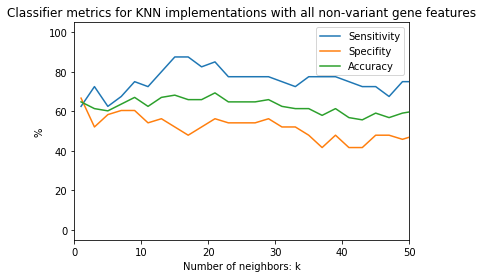

In [218]:
plt.plot(knn_nzv_stats[:,0], 100*knn_nzv_stats[:,5], label="Sensitivity")
plt.plot(knn_nzv_stats[:,0], 100*knn_nzv_stats[:,6], label="Specifity")
plt.plot(knn_nzv_stats[:,0], 100*knn_nzv_stats[:,7], label="Accuracy")
# plt.plot(knn_nzv_stats[:,0], 100*knn_nzv_stats[:,9], label="F1 Score")
plt.xlabel("Number of neighbors: k")
plt.ylabel("%")
plt.title("Classifier metrics for KNN implementations with all non-variant gene features")
plt.xlim((0,50))
plt.legend()
#best accuracy with 21 neighbors

In [176]:
knn_21 = KNeighborsClassifier(n_neighbors = 21)
sfs_vo = SFS(knn_21, 
          k_features=50, #(int(x_train.shape[1]/10)))
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=10,
          verbose=2,
          n_jobs=-1)
sfs_vo = sfs_vo.fit(x_train_nzv, y_train)

[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    1.2s finished

[2018-12-03 17:13:51] Features: 1/50 -- score: 0.6221428571428571[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    1.3s finished

[2018-12-03 17:13:53] Features: 2/50 -- score: 0.6590476190476191[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    1.4s finished

[2018-12-03 17:13:55] Features: 3/50 -- score: 0.6955555555555556[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:    1.1s finished

[2018-12-03 17:13:56] Features: 4/50 -- score: 0.7012698412698414[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    1.3s finished

[2018-12-03 17:13:58] Features: 5/50 -- score: 0.6930158730158731[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    1.5s finished

[2018-12-03 17:14:00] Features: 6/50 -- score: 0.6991269841269842[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    1.2s finished

[2018-12-03 17:14:02] Features: 7/50 -- score: 0.7130952380952381[Parallel(n_jobs=-1)]: Done 112 out of 11

from: can't read /var/mail/mlxtend.plotting
/bin/sh: import: command not found


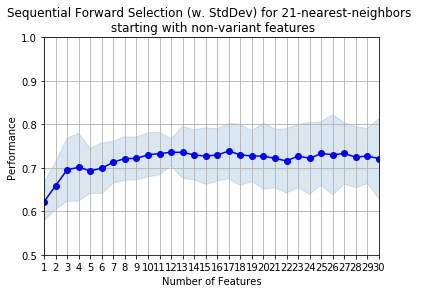

In [178]:
!from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
!import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs_vo.get_metric_dict(), kind='std_dev')

plt.ylim([0.5, 1])
plt.xlim([1,30])
plt.title('Sequential Forward Selection (w. StdDev) for 21-nearest-neighbors \n starting with non-variant features')
plt.grid()
plt.show()


In [181]:
sfs_data_nzv = pd.DataFrame.from_dict(sfs_vo.get_metric_dict()).T
sfs_data_nzv

,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
1,0.622143,0.0327224,"[0.5833333333333334, 0.6666666666666666, 0.6, ...","(77,)","(cg14428359,)",0.0440579,0.014686
2,0.659048,0.0409238,"[0.75, 0.5833333333333334, 0.7142857142857143,...","(77, 105)","(cg14428359, cg24117915)",0.0551004,0.0183668
3,0.695556,0.0538803,"[0.8055555555555556, 0.75, 0.6571428571428571,...","(15, 77, 105)","(cg03798162, cg14428359, cg24117915)",0.0725452,0.0241817
4,0.70127,0.0579948,"[0.8055555555555556, 0.75, 0.7714285714285715,...","(15, 77, 105, 106)","(cg03798162, cg14428359, cg24117915, cg24137774)",0.0780851,0.0260284
5,0.693016,0.0382572,"[0.75, 0.6944444444444444, 0.7142857142857143,...","(15, 51, 77, 105, 106)","(cg03798162, cg09982942, cg14428359, cg2411791...",0.0515101,0.01717
6,0.699127,0.0433371,"[0.6944444444444444, 0.6111111111111112, 0.771...","(15, 51, 77, 94, 105, 106)","(cg03798162, cg09982942, cg14428359, cg2248087...",0.0583497,0.0194499
7,0.713095,0.0357126,"[0.75, 0.6666666666666666, 0.7714285714285715,...","(12, 15, 51, 77, 94, 105, 106)","(cg03436208, cg03798162, cg09982942, cg1442835...",0.048084,0.016028
8,0.721429,0.0369932,"[0.7777777777777778, 0.7222222222222222, 0.742...","(12, 15, 42, 51, 77, 94, 105, 106)","(cg03436208, cg03798162, cg07895657, cg0998294...",0.0498081,0.0166027
9,0.721508,0.0366207,"[0.7777777777777778, 0.6944444444444444, 0.8, ...","(12, 15, 42, 45, 51, 77, 94, 105, 106)","(cg03436208, cg03798162, cg07895657, cg0872861...",0.0493067,0.0164356
10,0.729921,0.0376662,"[0.7777777777777778, 0.75, 0.7714285714285715,...","(12, 15, 42, 45, 51, 77, 93, 94, 105, 106)","(cg03436208, cg03798162, cg07895657, cg0872861...",0.0507143,0.0169048


In [186]:
final17_21NN_startingNZV = list(sfs_data_nzv.iloc[16]['feature_names'])
final17_21NN_startingNZV

['cg01445151',
 'cg03436208',
 'cg03798162',
 'cg05359518',
 'cg07315018',
 'cg07895657',
 'cg08728613',
 'cg09712682',
 'cg09982942',
 'cg10078009',
 'cg14428359',
 'cg17240135',
 'cg22160185',
 'cg22480875',
 'cg22753962',
 'cg24117915',
 'cg24137774']

In [189]:
#Transform train and test data to include only finalist features
x_train_reduced_nzv = x_train[final17_21NN_startingNZV]
x_test_reduced_nzv = x_test[final17_21NN_startingNZV]

In [190]:
#Evaluation of model performance on test data
model = KNeighborsClassifier(n_neighbors = 21)
model.fit(x_train_reduced_nzv.values, y_train.values)
y_predicted = model.predict(x_test_reduced_nzv.values)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predicted).ravel()
#sensitivity = recall
s = tp / (tp+fn)
#specificity
sp = tn / (tn+fp)
#accuracy
a = (tp+tn) / (tp+tn+fp+fn)
#precision = positive predictive value
p = tp / (tp+fp)
#f1-score
f1 = (2*tp)/ (2*tp + fp + fn)
stats = [tn, fp, fn, tp, s, sp, a, p, f1]
stats

[22,
 26,
 11,
 29,
 0.725,
 0.4583333333333333,
 0.5795454545454546,
 0.5272727272727272,
 0.6105263157894737]

In [191]:
np.savetxt('knn_17final_startingnzv', final17_21NN_startingNZV, fmt="%s")

old shape: (352, 3821)
new shape: (352, 382)
label train shape:(352,)


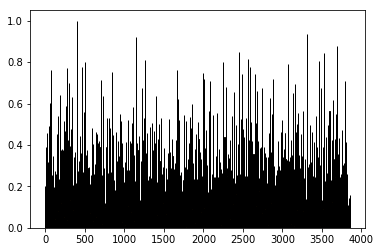

In [124]:
### Now starting with top 10% from anova fscore feature selection 
from sklearn.feature_selection import SelectPercentile, f_classif

selector = SelectPercentile(f_classif, percentile = 10)
selector.fit(merge_x, merge_y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
X_indices = np.arange(merge_x.shape[-1])
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')
selector = SelectPercentile(f_classif, percentile = 10)
selector.fit(x_train, y_train)
train_x_p10 = selector.transform(x_train)
test_x_p10 = selector.transform(x_test)

print("old shape: " + str(x_train.shape))
print("new shape: " + str(train_x_p10.shape))
print("label train shape:" + str(y_train.values.shape))

In [125]:
# # Original implementation before using 10-fold CV
# stats_knn_p10 = []
# for i in range(1,351,2): 
#     model = KNeighborsClassifier(n_neighbors = int(i))
#     model.fit(train_x_p10, y_train.values)
#     y_predicted = model.predict(test_x_p10)
#     tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predicted).ravel()
#     #sensitivity = recall
#     s = tp / (tp+fn)
#     #specificity
#     sp = tn / (tn+fp)
#     #accuracy
#     a = (tp+tn) / (tp+tn+fp+fn)
#     #precision = positive predictive value
#     p = tp / (tp+fp)
#     #f1-score
#     f1 = (2*tp)/ (2*tp + fp + fn)
#     stats_knn_p10.append([i, tn, fp, fn, tp, s, sp, a, p, f1])

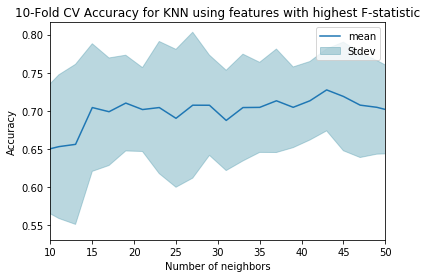

In [130]:
#Search for best K neighbors using 10% of features after anova threshold
k_range = range(1, 151, 2)
k_scores_anova_before = []
k_stdevs_anova_before = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_x_p10, y_train, cv=10, scoring='accuracy')
    k_scores_anova_before.append(scores.mean())
    k_stdevs_anova_before.append(scores.std())
plt.plot(k_range, k_scores_anova_before, label = 'mean')
plt.fill_between(k_range, np.array(k_scores_anova_before)-np.array(k_stdevs_anova_before), \
                 np.array(k_scores_anova_before)+np.array(k_stdevs_anova_before), color = '#539caf',\
                 alpha = 0.4, label = 'Stdev')
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.title("10-Fold CV Accuracy for KNN using features with highest F-statistic")
plt.legend()
plt.xlim((10,50))
plt.show()
#best k = 43

[0.6106349206349206,
 0.6562698412698412,
 0.6673809523809523,
 0.658888888888889,
 0.6474603174603173,
 0.6528571428571428,
 0.6558730158730158,
 0.7042063492063493,
 0.6987301587301588,
 0.7100793650793651,
 0.7015873015873016,
 0.7042063492063493,
 0.6900793650793651,
 0.7073015873015873,
 0.7072222222222223,
 0.6873015873015873,
 0.7042063492063493,
 0.7044444444444444,
 0.7130952380952381,
 0.7045238095238096,
 0.7130952380952381,
 0.7273809523809524,
 0.7188095238095238,
 0.7073809523809523,
 0.7045238095238096,
 0.698968253968254,
 0.7075396825396826,
 0.7188888888888889,
 0.7133333333333334,
 0.7103174603174603,
 0.7075396825396826,
 0.698968253968254,
 0.7075396825396826,
 0.7075396825396826,
 0.696111111111111,
 0.7104761904761905,
 0.699047619047619,
 0.6876190476190476,
 0.6876984126984127,
 0.6904761904761905,
 0.6903968253968253,
 0.696111111111111,
 0.7018253968253969,
 0.6818253968253968,
 0.698968253968254,
 0.6903968253968255,
 0.6818253968253968,
 0.6818253968253968,

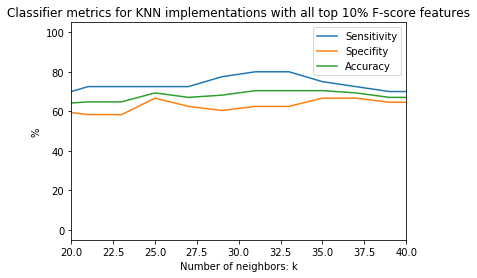

In [226]:
plt.plot(knn_p10_stats[:,0], 100*knn_p10_stats[:,5], label="Sensitivity")
plt.plot(knn_p10_stats[:,0], 100*knn_p10_stats[:,6], label="Specifity")
plt.plot(knn_p10_stats[:,0], 100*knn_p10_stats[:,7], label="Accuracy")
# plt.plot(knn_nzv_stats[:,0], 100*knn_nzv_stats[:,9], label="F1 Score")
plt.xlabel("Number of neighbors: k")
plt.ylabel("%")
plt.title("Classifier metrics for KNN implementations with all top 10% F-score features")
plt.xlim((20,40))
plt.legend()
#best number of neighbors is 31 (highest accuracy)

In [227]:
knn_31 = KNeighborsClassifier(n_neighbors = 31)
sfs_p10 = SFS(knn_31, 
          k_features=50, #(int(x_train.shape[1]/10)))
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=10,
          verbose=2,
          n_jobs=-1)
sfs_p10 = sfs_p10.fit(train_x_p10, y_train)

[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 382 out of 382 | elapsed:    4.0s finished

[2018-12-03 17:54:36] Features: 1/50 -- score: 0.6846825396825398[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 381 out of 381 | elapsed:    3.6s finished

[2018-12-03 17:54:40] Features: 2/50 -- score: 0.7042063492063493[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 380 out of 380 | elapsed:    3.5s finished

[2018-12-03 17:54:44] Features: 3/50 -- score: 0.7296825396825397[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 379 out of 379 | elapsed:    3.9s finished

[2018-12-03 17:54:48] Features: 4/50 -- score: 0.7411904761904763[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 378 out of 378 | elapsed:    4.4s finished

[2018-12-03 17:54:53] Features: 5/50 -- score: 0.7525396825396826[Para

[2018-12-03 17:57:52] Features: 38/50 -- score: 0.7867460317460317[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 344 out of 344 | elapsed:    4.2s finished

[2018-12-03 17:57:57] Features: 39/50 -- score: 0.7896031746031746[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 336 out of 343 | elapsed:    4.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 343 out of 343 | elapsed:    4.2s finished

[2018-12-03 17:58:02] Features: 40/50 -- score: 0.7925396825396825[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 342 out of 342 | elapsed:    4.3s finished

[2018-12-03 17:58:06] Features: 41/50 -- score: 0.783968253968254[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 341 out of 341 | elapsed:    4.3s finished

[2018-12-03 17:58:11] Features: 42/50 -- score: 0.7869841269841269[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed: 

from: can't read /var/mail/mlxtend.plotting
/bin/sh: import: command not found


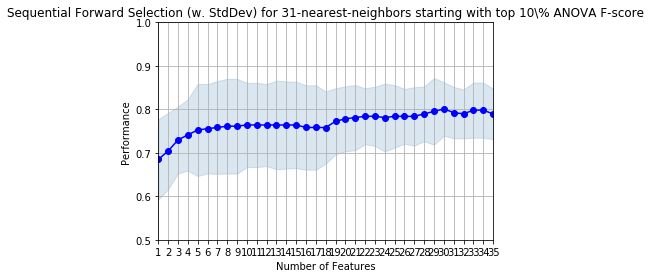

In [235]:
!from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
!import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs_p10.get_metric_dict(), kind='std_dev')

plt.ylim([0.5, 1])
plt.xlim([1,35])
plt.title('Sequential Forward Selection (w. StdDev) for \
31-nearest-neighbors starting with top 10\% ANOVA F-score')
plt.grid()
plt.show()

In [236]:
sfs_data_p10 = pd.DataFrame.from_dict(sfs_p10.get_metric_dict()).T
sfs_data_p10

,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
1,0.684683,0.0686061,"[0.6944444444444444, 0.6666666666666666, 0.771...","(87,)","(87,)",0.0923723,0.0307908
2,0.704206,0.065149,"[0.7777777777777778, 0.75, 0.7714285714285715,...","(87, 297)","(87, 297)",0.0877177,0.0292392
3,0.729683,0.0570964,"[0.8333333333333334, 0.7777777777777778, 0.8, ...","(71, 87, 297)","(71, 87, 297)",0.0768754,0.0256251
4,0.74119,0.0608678,"[0.8055555555555556, 0.7777777777777778, 0.828...","(71, 80, 87, 297)","(71, 80, 87, 297)",0.0819534,0.0273178
5,0.75254,0.0786823,"[0.8055555555555556, 0.8055555555555556, 0.914...","(71, 80, 87, 204, 297)","(71, 80, 87, 204, 297)",0.105939,0.035313
6,0.755476,0.0763222,"[0.8055555555555556, 0.7777777777777778, 0.885...","(71, 80, 87, 204, 297, 338)","(71, 80, 87, 204, 297, 338)",0.102761,0.0342538
7,0.758333,0.079222,"[0.8055555555555556, 0.7777777777777778, 0.914...","(71, 80, 87, 199, 204, 297, 338)","(71, 80, 87, 199, 204, 297, 338)",0.106666,0.0355553
8,0.76119,0.0808583,"[0.8055555555555556, 0.7777777777777778, 0.914...","(71, 80, 87, 137, 199, 204, 297, 338)","(71, 80, 87, 137, 199, 204, 297, 338)",0.108869,0.0362896
9,0.76119,0.0808583,"[0.8055555555555556, 0.7777777777777778, 0.914...","(10, 71, 80, 87, 137, 199, 204, 297, 338)","(10, 71, 80, 87, 137, 199, 204, 297, 338)",0.108869,0.0362896
10,0.764048,0.0719019,"[0.8055555555555556, 0.7777777777777778, 0.885...","(10, 71, 78, 80, 87, 137, 199, 204, 297, 338)","(10, 71, 78, 80, 87, 137, 199, 204, 297, 338)",0.0968098,0.0322699


In [267]:
final30_31NN_p10_bynum = list(sfs_data_p10.iloc[29]['feature_names'])
p10_final_idxs = np.where(selector.get_support() == True)[0][[int(x) for x in final30_31NN_p10_bynum]]
final30_31NN_p10 = x_train.columns[p10_final_idxs]
np.savetxt('KNN_final30_p10', final30_31NN_p10, fmt="%s")
final30_31NN_p10
# my_dataframe.columns.values.tolist()



Index(['cg00691969', 'cg03717830', 'cg04496895', 'cg04630334', 'cg04766793',
       'cg04882273', 'cg05143420', 'cg05144540', 'cg05166490', 'cg05512099',
       'cg05654049', 'cg07430472', 'cg08127941', 'cg08230118', 'cg09325156',
       'cg09405790', 'cg10585161', 'cg11677857', 'cg12792044', 'cg13370819',
       'cg14415885', 'cg15701254', 'cg16727201', 'cg20087221', 'cg20133191',
       'cg20249919', 'cg23754772', 'cg24800880', 'cg26391350', 'cg27613076'],
      dtype='object')

In [266]:
#Transform train and test data to include only finalist features
x_train_reduced_p10 = x_train[final30_31NN_p10]
x_test_reduced_p10 = x_test[final30_31NN_p10]

#Evaluation of model performance on test data
model = KNeighborsClassifier(n_neighbors = 31)
model.fit(x_train_reduced_p10.values, y_train.values)
y_predicted = model.predict(x_test_reduced_p10.values)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predicted).ravel()
#sensitivity = recall
s = tp / (tp+fn)
#specificity
sp = tn / (tn+fp)
#accuracy
a = (tp+tn) / (tp+tn+fp+fn)
#precision = positive predictive value
p = tp / (tp+fp)
#f1-score
f1 = (2*tp)/ (2*tp + fp + fn)
stats = [tn, fp, fn, tp, s, sp, a, p, f1]
stats

[28,
 20,
 11,
 29,
 0.725,
 0.5833333333333334,
 0.6477272727272727,
 0.5918367346938775,
 0.651685393258427]

In [268]:
#Now checking overlap between three candidate sets
setAll = set(final30_73NN_startingall)
setNZV = set(final17_21NN_startingNZV)
setAnova = set(final30_31NN_p10)

In [270]:
setAll.intersection(setAnova)

{'cg00691969', 'cg05512099'}

In [271]:
setNZV.intersection(setAnova)

set()

Text(0,0.5,'Frequency')

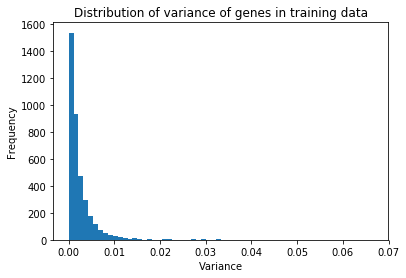

In [281]:
plt.hist(x_train.var(axis=0), bins='sqrt')
plt.title('Distribution of variance of genes in training data')
plt.xlabel('Variance')
plt.ylabel('Frequency')

In [ ]:
#Now analyzing the final gene sets with KNN

In [104]:
#Start by using all of the features
# search for an optimal value of K for KNN


k_range = range(1, 151, 2)
k_scores_all = []
k_stdevs_all = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    k_scores_all.append(scores.mean())
    k_stdevs_all.append(scores.std())

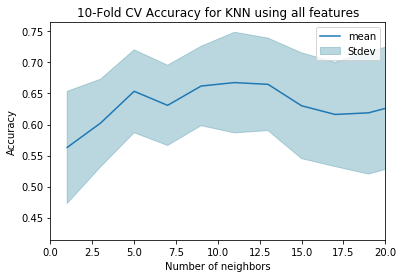

The 10-fold CV Accuracy for 13NN with all features: 66.46825396825398%


In [115]:
plt.plot(k_range, k_scores_all, label = 'mean')
plt.fill_between(k_range, np.array(k_scores_all)-np.array(k_stdevs_all), \
                 np.array(k_scores_all)+np.array(k_stdevs_all), color = '#539caf',\
                 alpha = 0.4, label = 'Stdev')
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.title("10-Fold CV Accuracy for KNN using all features")
plt.legend()
plt.xlim((0,20))
plt.show()
#best-k = 13
for i, k in enumerate(k_range):
    if k == 13:
        print("The 10-fold CV Accuracy for 13NN with all features: " + str((100*k_scores_all[i])) + "%")

In [116]:
#Final test set accuracy
#Evaluation of model performance on test data
model = KNeighborsClassifier(n_neighbors = 13)
model.fit(x_train.values, y_train.values)
y_predicted = model.predict(x_test.values)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predicted).ravel()
#sensitivity = recall
s = tp / (tp+fn)
#specificity
sp = tn / (tn+fp)
#accuracy
a = (tp+tn) / (tp+tn+fp+fn)
#precision = positive predictive value
p = tp / (tp+fp)
#f1-score
f1 = (2*tp)/ (2*tp + fp + fn)
stats = [tn, fp, fn, tp, s, sp, a, p, f1]
print("Final test set accuracy for 13NN with all features: " + str('{:.4g}'.format(100*a)) +'%')

Final test set accuracy for 13NN with all features: 62.5%


In [36]:
#For the first gene set, the union of all gene sets:

#read in union of sets
union_genes = np.loadtxt('unionall', dtype=str) 

x_train_union = x_train[union_genes]
x_test_union = x_test[union_genes]

In [60]:
# search for an optimal value of K for KNN


k_range = range(1, 151, 2)
k_scores_union = []
k_stdevs_union = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train_union, y_train, cv=10, scoring='accuracy')
    k_scores_union.append(scores.mean())
    k_stdevs_union.append(scores.std())
    
#     print("For k = %s, mean is %s" %(str(k), str('{:.3g}'.format(scores.mean()))))
    


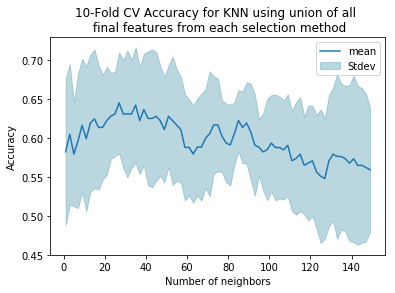

The 10-fold CV Accuracy for 27NN with all features: 64.5%


In [71]:
plt.plot(k_range, k_scores_union, label = 'mean')
plt.fill_between(k_range, np.array(k_scores_union)-np.array(k_stdevs_union), \
                 np.array(k_scores_union)+np.array(k_stdevs_union), color = '#539caf',\
                 alpha = 0.4, label = 'Stdev')
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.title("10-Fold CV Accuracy for KNN using union of all \n final features from each selection method")
plt.legend()
# plt.xlim((10,50))
plt.show()
#best K is 27
for i, k in enumerate(k_range):
    if k == 27:
        print("The 10-fold CV Accuracy for 27NN with union features: " + str((100*k_scores_union[i])) + "%")

In [111]:
#Final test set accuracy
#Evaluation of model performance on test data
model = KNeighborsClassifier(n_neighbors = 27)
model.fit(x_train_union.values, y_train.values)
y_predicted = model.predict(x_test_union.values)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predicted).ravel()
#sensitivity = recall
s = tp / (tp+fn)
#specificity
sp = tn / (tn+fp)
#accuracy
a = (tp+tn) / (tp+tn+fp+fn)
#precision = positive predictive value
p = tp / (tp+fp)
#f1-score
f1 = (2*tp)/ (2*tp + fp + fn)
stats = [tn, fp, fn, tp, s, sp, a, p, f1]
print("Final test set accuracy for 27NN with union features: " + str('{:.4g}'.format(100*a)) +'%')

Final test set accuracy for 27NN with union features: 65.91%


In [86]:
#For the first gene set, the union of all gene sets:

#read in union of sets
atleast2sets_genes = np.loadtxt('atleast2', dtype=str) 

x_train_al2s = x_train[atleast2sets_genes]
x_test_al2s = x_test[atleast2sets_genes]

# search for an optimal value of K for KNN
k_range = range(1, 151, 2)
k_scores_al2s = []
k_stdevs_al2s = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train_al2s, y_train, cv=20, scoring='accuracy')
    k_scores_al2s.append(scores.mean())
    k_stdevs_al2s.append(scores.std())

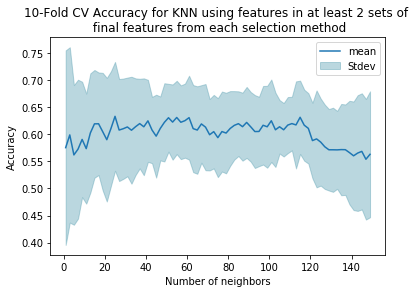

The 10-fold CV Accuracy for 25NN with intersecting features: 63.08730158730159%


In [102]:
plt.plot(k_range, k_scores_al2s, label = 'mean')
plt.fill_between(k_range, np.array(k_scores_al2s)-np.array(k_stdevs_al2s), \
                 np.array(k_scores_al2s)+np.array(k_stdevs_al2s), color = '#539caf',\
                 alpha = 0.4, label = 'Stdev')
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.title("10-Fold CV Accuracy for KNN using features in at least 2 sets of \n final features from each selection method")
plt.legend()
# plt.xlim((20,40))
plt.show()
#Best K is 25
for i, k in enumerate(k_range):
    if k == 25:
        print("The 10-fold CV Accuracy for 25NN with intersecting features: " + str((100*k_scores_union[i])) + "%")

In [101]:
#Final test set accuracy
#Evaluation of model performance on test data
model = KNeighborsClassifier(n_neighbors = 25)
model.fit(x_train_al2s.values, y_train.values)
y_predicted = model.predict(x_test_al2s.values)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predicted).ravel()
#sensitivity = recall
s = tp / (tp+fn)
#specificity
sp = tn / (tn+fp)
#accuracy
a = (tp+tn) / (tp+tn+fp+fn)
#precision = positive predictive value
p = tp / (tp+fp)
#f1-score
f1 = (2*tp)/ (2*tp + fp + fn)
stats = [tn, fp, fn, tp, s, sp, a, p, f1]
print("Final test set accuracy for 25NN with intersecting features: " + str('{:.4g}'.format(100*a)) +'%')

Final test set accuracy for 25NN with intersecting features: 62.5%


'0.19.1'